In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

# Q1

In [2]:
tickers = ['AA','AAPL','BA', 'JBL', 'NVDA', 'SBUX', 'XOM']
date_range = pd.date_range(start='2022-01-03', periods=88, freq='D')
date_string = [i.strftime('%Y%m%d') for i in date_range]
n = len(date_string)
def my_plot(ticker, prop):
    path = './'+ticker+'/bars.'+ticker+'.'
    avg_prop = []
    x_ticks = []
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            x_ticks.append(date_string[i])
            temp = pd.read_csv(file_path, sep=' ')[prop]
            avg_prop.append(temp.mean())
    plt.figure(figsize=(10, 5))
    plt.plot(avg_prop)
    plt.ylabel('Average '+ prop)
    plt.xlabel('Date')
    plt.xticks(ticks=range(len(x_ticks)),labels=x_ticks, rotation=90)
    plt.title('Average '+ prop + ' for '+ ticker)
    plt.show()

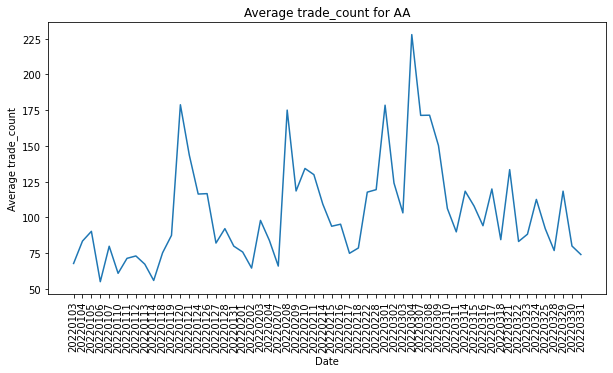

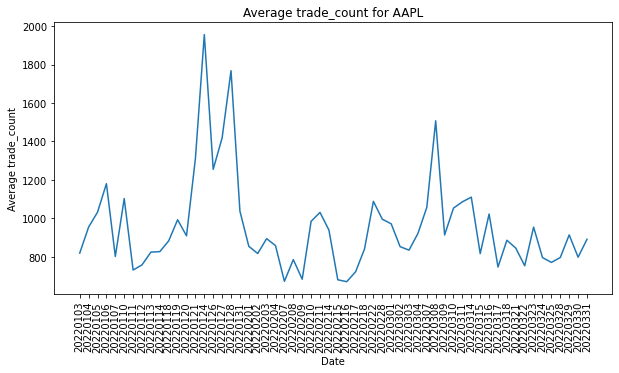

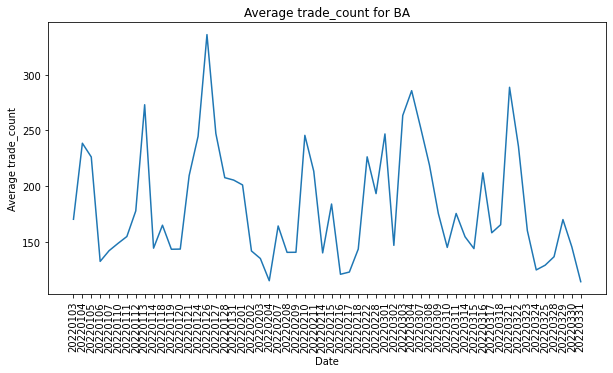

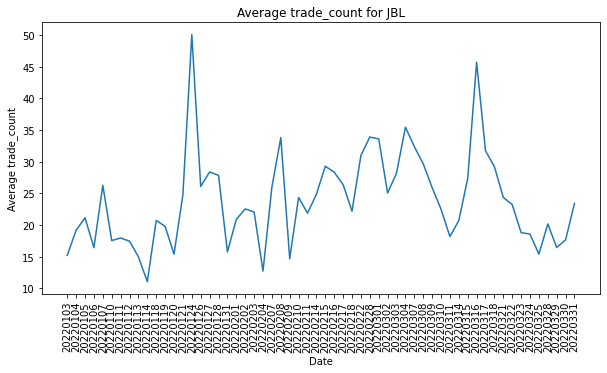

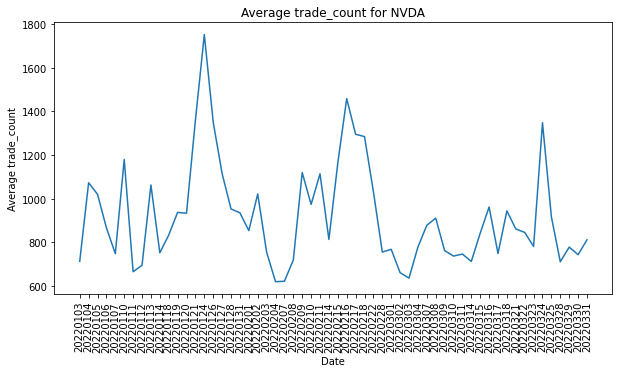

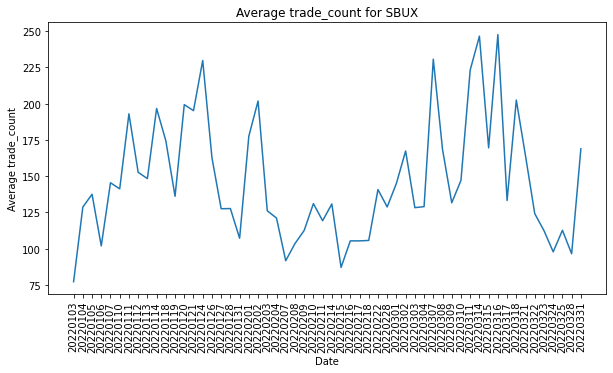

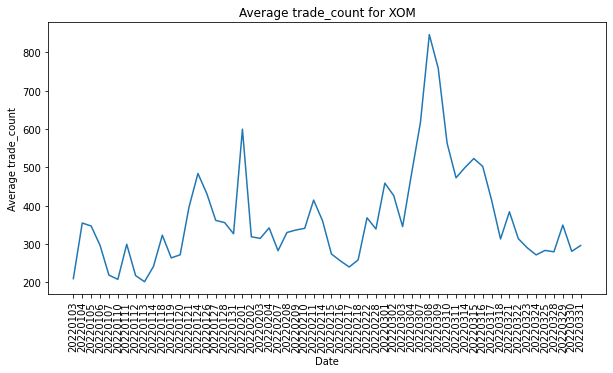

In [3]:
# (a)
for ticker in tickers:
    my_plot(ticker, 'trade_count')

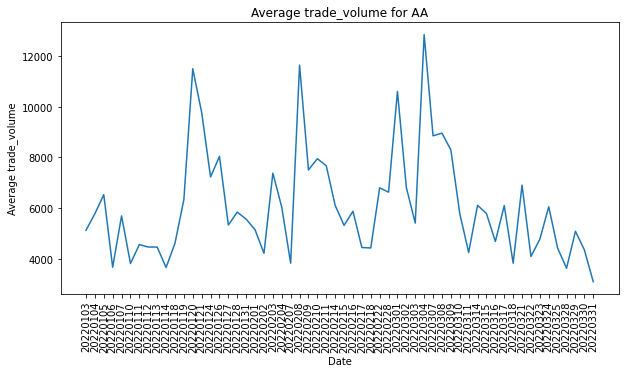

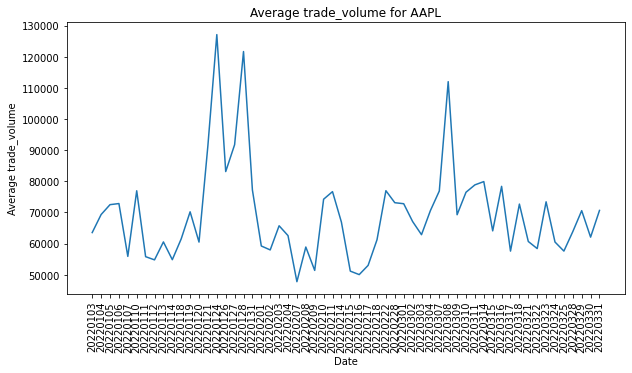

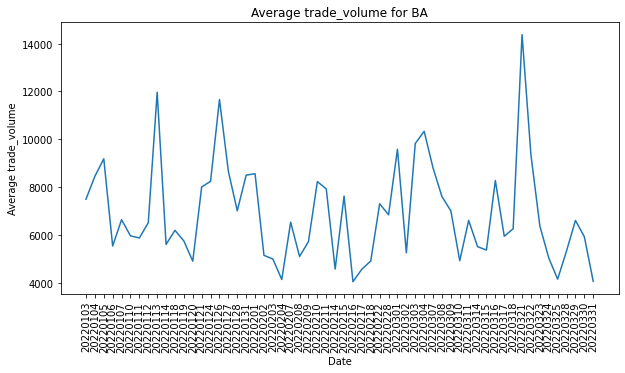

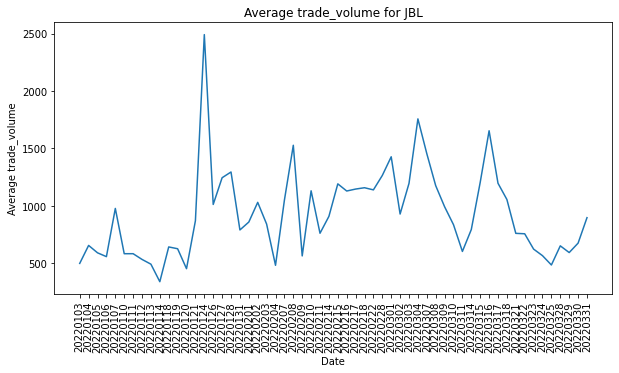

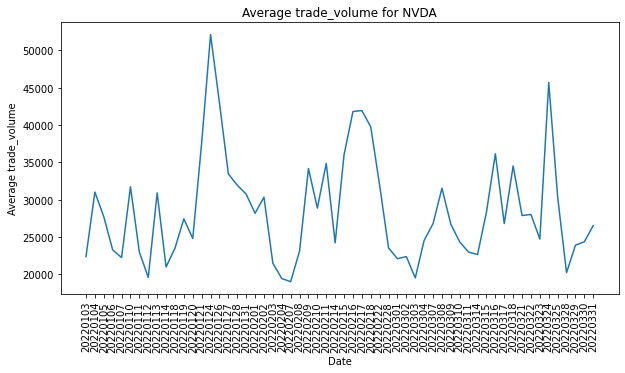

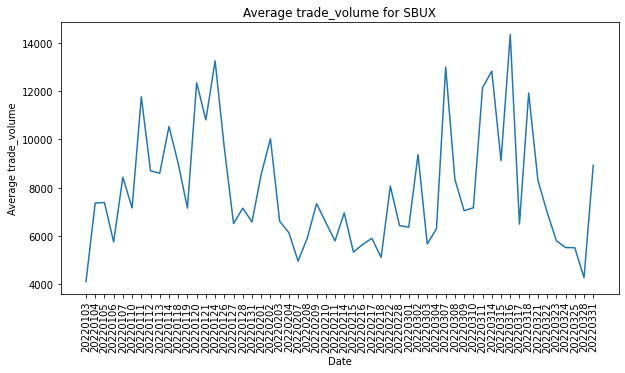

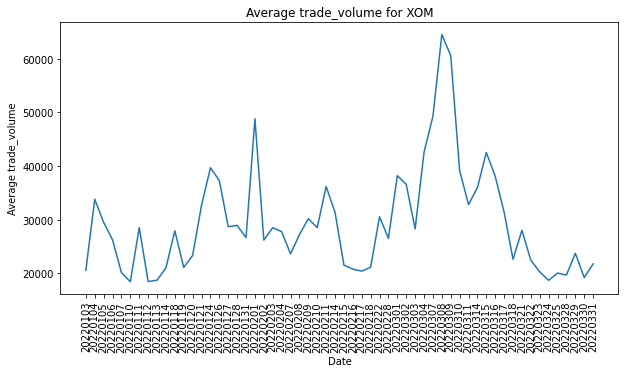

In [4]:
# (b)
for ticker in tickers:
    my_plot(ticker, 'trade_volume')

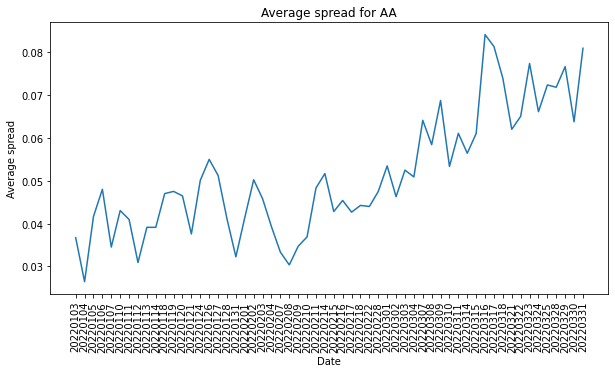

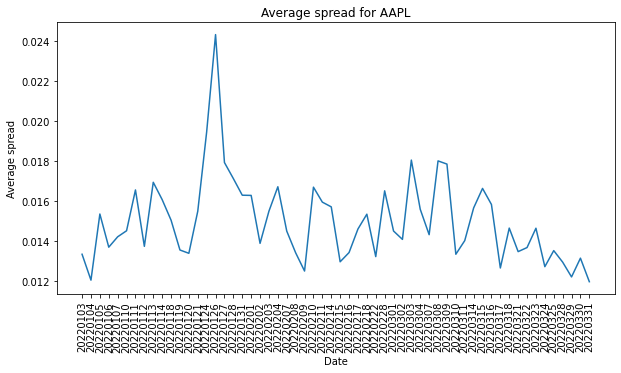

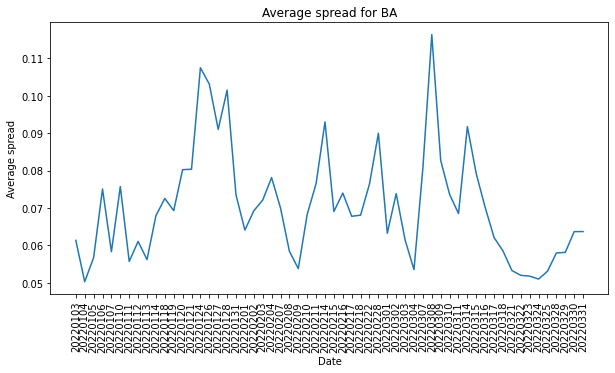

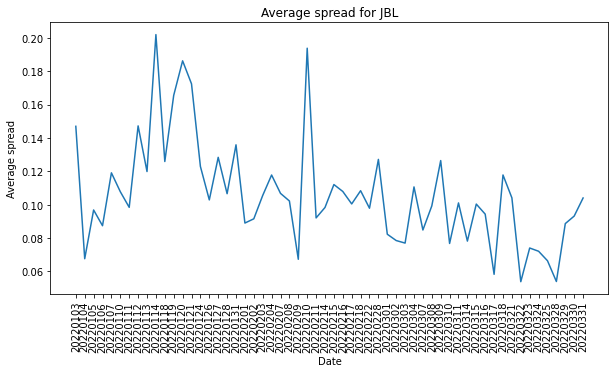

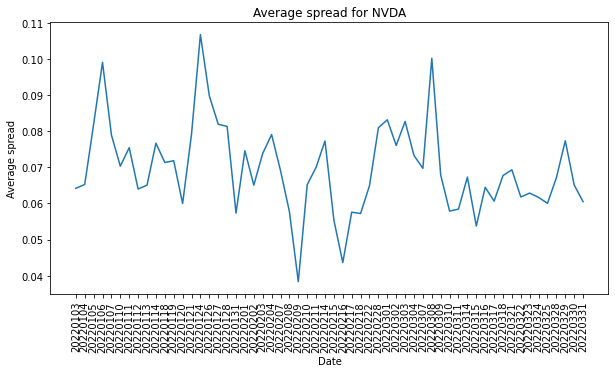

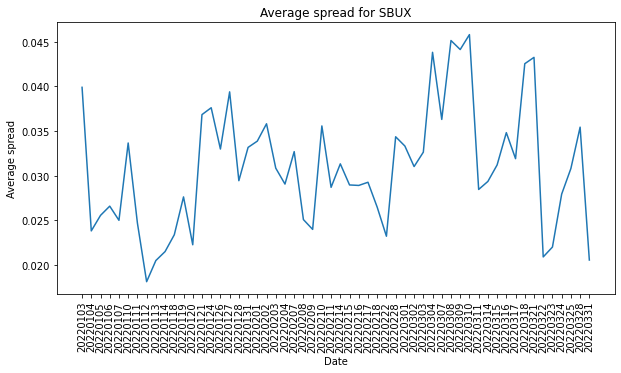

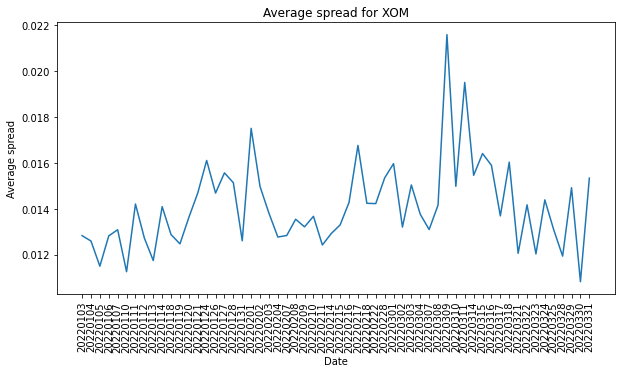

In [19]:
# (c)
def my_plot2(ticker):
    path = './'+ticker+'/bars.'+ticker+'.'
    avg_spread = []
    x_ticks = []
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            x_ticks.append(date_string[i])
            df = pd.read_csv(file_path, sep=' ')
            spread = df['ask_price'] - df['bid_price']
            spread = spread[spread>=0].mean()
            avg_spread.append(spread)
    plt.figure(figsize=(10, 5))
    plt.plot(avg_spread)
    plt.ylabel('Average spread')
    plt.xlabel('Date')
    plt.xticks(ticks=range(len(x_ticks)),labels=x_ticks, rotation=90)
    plt.title('Average spread' + ' for '+ ticker)
    plt.show()
    
for ticker in tickers:
    my_plot2(ticker)

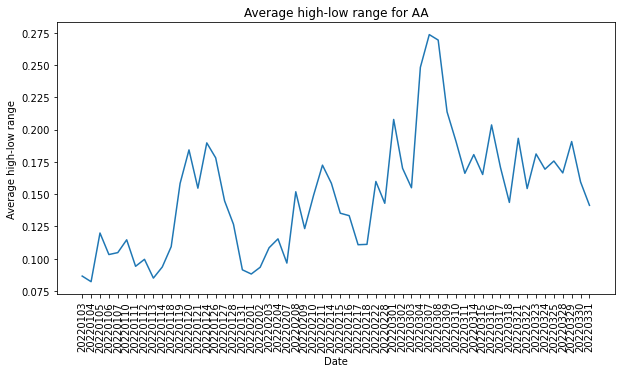

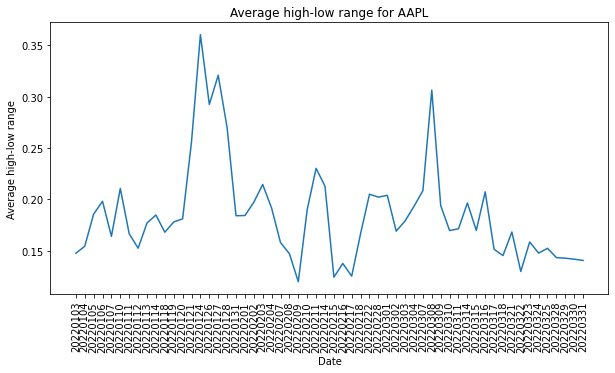

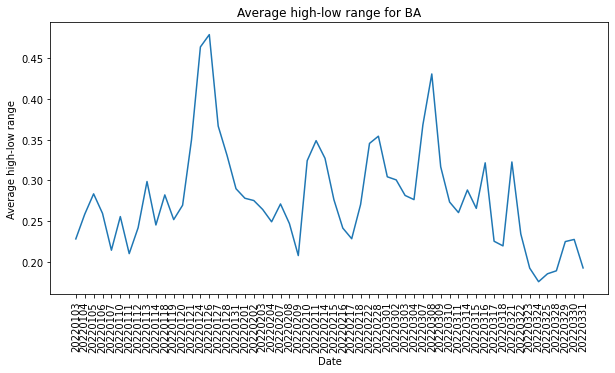

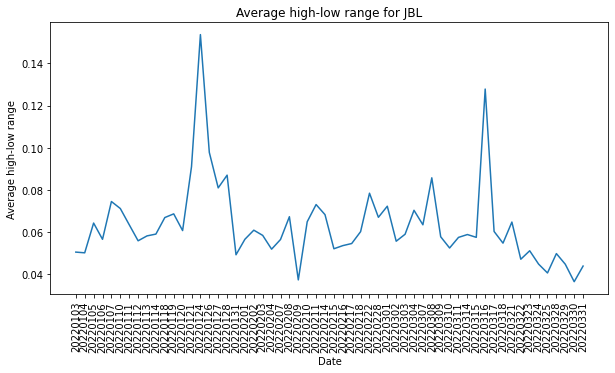

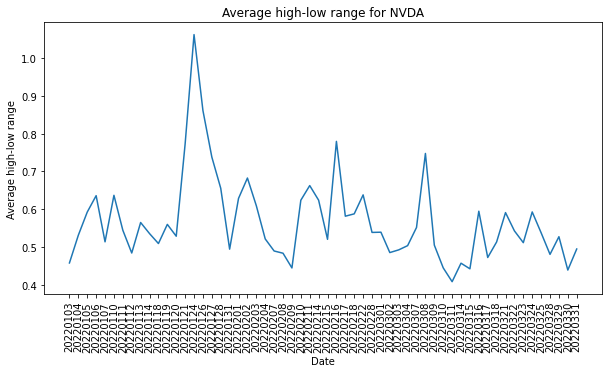

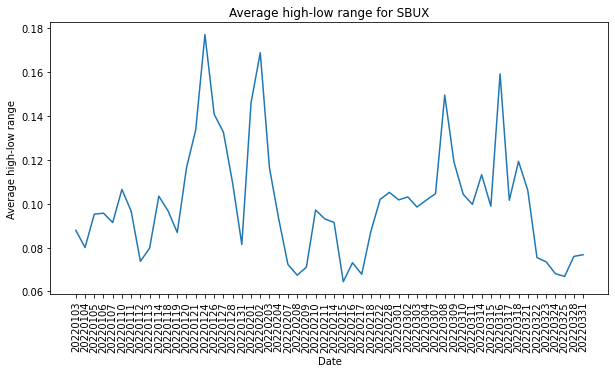

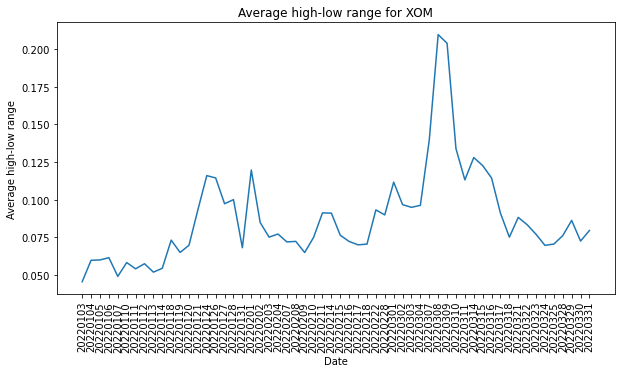

In [14]:
# (d)
def my_plot3(ticker):
    path = './'+ticker+'/bars.'+ticker+'.'
    avg_range = []
    x_ticks = []
    for i in range(n):
        file_path = path + date_string[i]
        if os.path.exists(file_path):
            x_ticks.append(date_string[i])
            df = pd.read_csv(file_path, sep=' ')
            rge = (df['trade_high'] - df['trade_low']).mean()
            avg_range.append(rge)
    plt.figure(figsize=(10, 5))
    plt.plot(avg_range)
    plt.ylabel('Average high-low range')
    plt.xlabel('Date')
    plt.xticks(ticks=range(len(x_ticks)),labels=x_ticks, rotation=90)
    plt.title('Average high-low range' + ' for '+ ticker)
    plt.show()
    
for ticker in tickers:
    my_plot3(ticker)

# Q2

(1) Average trade counts for all the stocks (in minute) is highly volitile and unpredictable, so is the average trade volume. There can be a valley following a peak.

(2) Average trade counts and average trade volumes are highly correlated, and they share similar patterns in the time series plot.

(3) For the average bid-ask spread, there are cases when bid prices are larger than ask prices. We drop these abnormal cases and find the average. The time series plots of bid-ask spread of most stocks are chaotic. Majority of stocks have small bid-ask spreads, except for JBL, NVDA and SBUX. The bid-ask spreak for AA shows an increasing pattern, which may indicate divergence of opinions on it.

(4) High-low price range and bid-ask spread are also correlated and can share similar time-dependent pattern. It makes sense that when the bid-ask spread is large, the price at which trades occur also varies.